Working through the Higham paper on SDEs http://epubs.siam.org/doi/pdf/10.1137/S0036144500378302

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline
%precision 5

u'%.5f'

A scalar Brownian motion or a Wiener process over an interval $[0,T]$ is a stochastic process that depends continuously on $t \in [0,T]$ and satisfies the following:

1.  $W(0) = 0$ with probability 1

2. For  $0 \leq s < t \leq T$ the random variable given by the increment $W(t)-W(s)$ is normally distributed with zero mean and variance $t-s$, and

3. For $0 \leq s < t < u < v \leq T$ the increments $W(t) - W(s)$ and $W(v) - W(u)$ are independent.

This can be simulated by considering $W(t)$ at discrete times.  To this end, let $N$ be some positive integer and set $\delta t = \frac{T}{N}$.  We then denote by $W_j$ the value $W(t_j)$, a sample of the random path at time $t_j = j\delta t$.


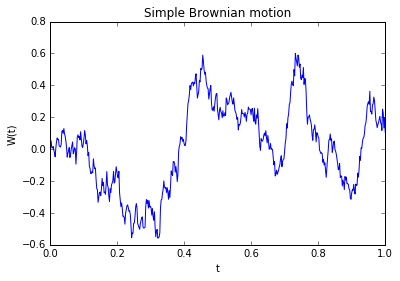

In [117]:
# version 1: not vectorized
T = 1
N = 500
dt = T/N
dW = np.zeros((N,1))
W = np.zeros((N,1))
dW[0] = np.sqrt(dt)*np.random.normal(0,1)
W[0] = dW[0]
for j in range(1,N):
    dW[j] = np.sqrt(dt)*np.random.normal(0,1)
    W[j] = W[j-1] + dW[j]
    
plt.plot(np.linspace(0,T,N),W)
plt.title('Simple Brownian motion')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.show()

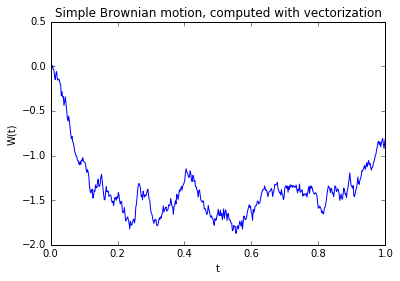

In [118]:
# version 2: vectorized
T = 1
N = 500
dt = T/N
dW = np.sqrt(dt)*np.random.normal(0,1,N)
W = np.cumsum(dW)
plt.plot(np.linspace(0,T,N),W)
plt.title('Simple Brownian motion, computed with vectorization')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.show()

In [119]:
# now compute several sample paths and take the expected value


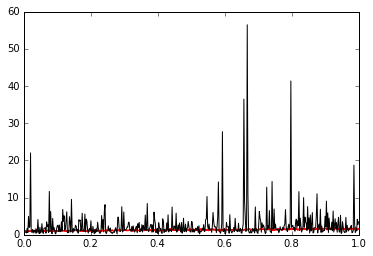

In [126]:
T = 1
N = 500
dt = T/N
t = np.linspace(0,T,N)
t = t.reshape(500,1)
M = 1000   # number of sample paths
dW = np.sqrt(dt)*np.random.normal(0,1,(N,M))
W = np.cumsum(dW, 1)
U = np.exp(0.5*np.matlib.repmat(t,1,M) + W)
Umean = np.mean(U,1)
plt.plot(t,U[:,0:5],'r')
plt.plot(t,Umean,'k')
plt.show()

In [127]:
t.shape

(500, 1)

In [128]:
U.shape

(500, 1000)